# Entregable 1 - Data Engineering & Preprocessing

**Proyecto:** Limpieza y Preprocesado de Datos para Predicción de Precios  
**Dataset:** bmw_pricing_v3.csv  
**Objetivo:** Preparar datos para modelo de Machine Learning  
**Integrante:** Alexis Labrador  
**Fecha:** Noviembre 2025

---

## 1. Configuración Inicial

### 1.1 Configuración para Google Colab

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.2 Importar Librerías

In [73]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

BASE_PATH = "/content/drive/MyDrive/Nuclio Master/Entregable 1"

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


---

## 2. Carga de Datos

### Cargar Dataset Original

In [53]:
# Cargar el dataset
df = pd.read_csv(f'{BASE_PATH}/bmw_pricing_v3.csv')

print(f"✓ Dataset cargado exitosamente")
print(f"  Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas\n")
print(df)

✓ Dataset cargado exitosamente
  Dimensiones: 4,843 filas × 18 columnas

     marca             modelo        km  potencia fecha_registro tipo_gasolina   color   tipo_coche volante_regulable aire_acondicionado camara_trasera asientos_traseros_plegables elevalunas_electrico bluetooth   gps alerta_lim_velocidad   precio fecha_venta
0      NaN                118 140411.00    100.00     2012-02-01        diesel   black          NaN              True               True          False                         NaN                 True       NaN  True                  NaN 11300.00  2018-01-01
1      BMW                 M4  13929.00    317.00            NaN        petrol    grey  convertible              True               True          False                         NaN                False      True  True                 True 69700.00  2018-02-01
2      BMW                320 183297.00    120.00     2012-04-01        diesel   white          NaN             False              False          Fals

---

## 3. Análisis Exploratorio Inicial

### 3.1 Información General del Dataset

In [89]:
print("=" * 80, "\nINFORMACIÓN DEL DATASET\n" + "=" * 80, "\n")

df.info()

print("\n" + "=" * 80, "\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS\n" + "=" * 80, "\n")
display(df.describe())

print("\n" + "=" * 80, "\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS\n" + "=" * 80, "\n")
display(df.describe(include=['object']))


INFORMACIÓN DEL DATASET

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object

,km,potencia,precio
count,4841.00,4842.00,4837.00
mean,140959.35,128.98,15831.92
std,60208.53,38.99,9222.63
min,-64.00,0.00,100.00
25%,102884.00,100.00,10800.00
50%,141080.00,120.00,14200.00
75%,175217.00,135.00,18600.00
max,1000376.00,423.00,178500.00



ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS



,marca,modelo,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,fecha_venta
count,3873,4840,2420,4838,4398,3383,4839,4357,4841,1452,4841,4115,4115,4842
unique,1,76,180,5,10,8,2,2,2,2,2,2,2,13
top,BMW,320,2013-07-01,diesel,black,estate,True,True,False,False,False,False,True,2018-05-01
freq,3873,752,93,4631,1499,1107,2662,3465,3864,1150,2612,3119,2240,809


### 3.2 Análisis de Valores Nulos

VALORES NULOS POR COLUMNA



,Columna,Nulos,Porcentaje
11,asientos_traseros_plegables,3391,70.02
4,fecha_registro,2423,50.03
7,tipo_coche,1460,30.15
0,marca,970,20.03
13,bluetooth,728,15.03
15,alerta_lim_velocidad,728,15.03
9,aire_acondicionado,486,10.04
6,color,445,9.19
16,precio,6,0.12
5,tipo_gasolina,5,0.10


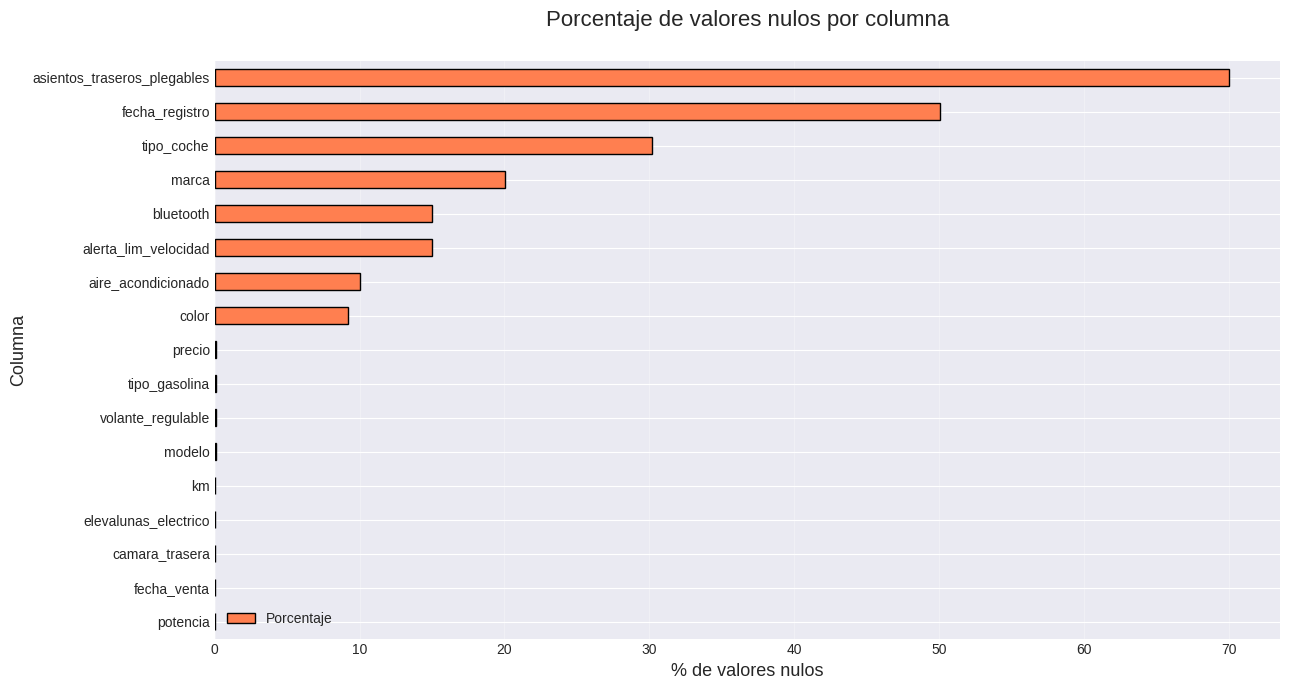

In [78]:
def analizar_valores_nulos(df: pd.DataFrame) -> pd.DataFrame:
    """
      Analiza y visualiza los valores nulos en el dataset

      Args:
        df : Dataset a analizar

      Returns:
        Tabla con conteo y porcentaje de nulos
    """
    nulos = df.isnull().sum()
    porcentaje_nulos = (nulos / len(df)) * 100

    tabla_nulos = pd.DataFrame({
        'Columna': nulos.index,
        'Nulos': nulos.values,
        'Porcentaje': porcentaje_nulos.values
    })

    tabla_nulos = tabla_nulos[tabla_nulos['Nulos'] > 0].sort_values('Nulos', ascending=False)

    return tabla_nulos


# Analizar nulos
tabla_nulos = analizar_valores_nulos(df)

print("=" * 80, "\nVALORES NULOS POR COLUMNA\n" + "=" * 80, "\n")
display(tabla_nulos)
print("\n")

# Visualización
if len(tabla_nulos) > 0:
    fig, ax = plt.subplots(figsize=(13, 7))
    tabla_nulos.sort_values('Porcentaje', ascending=True).plot(
        x='Columna', y='Porcentaje', kind='barh', ax=ax, color='coral', edgecolor='black'
    )
    ax.set_xlabel('% de valores nulos', fontsize=13)
    ax.set_ylabel('Columna', fontsize=13)
    ax.set_title('Porcentaje de valores nulos por columna', fontsize=16, pad=25)
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("✓ No hay valores nulos en el dataset")


### 3.3 Detección de Valores Anómalos

In [90]:
def detectar_anomalias(df: pd.DataFrame) -> dict:
    """
      Detecta valores anómalos en el dataset (Km, potencia y precio)

      Args:
        df : Dataset a analizar

      Returns:
        Diccionario con anomalías detectadas
    """
    anomalias = dict()

    # KM negativos
    if 'km' in df.columns:
        km_negativos = (df['km'] < 0).sum()
        if km_negativos > 0:
            anomalias['km_negativos'] = km_negativos

    # Campos que deben ser > 0
    campos_pos = {
        'potencia': 'potencia_invalida',
        'precio': 'precios_invalidos'
    }

    for col, key in campos_pos.items():
        if col in df.columns:
            invalidos = (df[col] <= 0).sum()
            if invalidos > 0:
                anomalias[key] = invalidos

    return anomalias


# Detectar anomalías
anomalias = detectar_anomalias(df)

print("=" * 80, "\nDETECCIÓN DE VALORES ANÓMALOS\n" + "=" * 80, "\n")

if anomalias:
    for tipo, cantidad in anomalias.items():
        print(f"{tipo}: {cantidad} {'registro' if cantidad == 1 else 'registros'}")
else:
    print("✓ No se detectaron anomalías evidentes")


DETECCIÓN DE VALORES ANÓMALOS

km_negativos: 1 registro
potencia_invalida: 1 registro


### 3.4 Análisis de la Variable objetivo/Target (Precio)